In [ ]:
# Instalación de librerías
%pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------  8.7/8.7 MB 68.7 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 35.7 MB/s  0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------  12.6/12.8 MB 75.2 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 52.0 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ------------- -------------------------- 12.8/38.5 MB 63.0 MB/s eta 0:00:01
   ------------------------------ --------- 29.4/38.5 MB 69.5 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.5 MB 70.5 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 50.9 MB/s  0:00:00

   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   

In [5]:
# Importación de dependencias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import pandas as pd

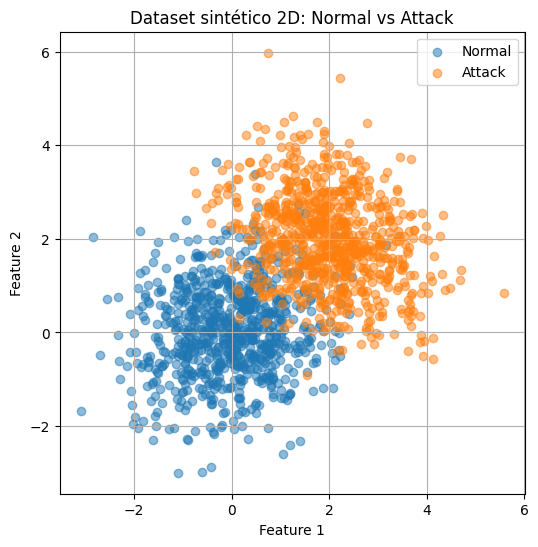

In [6]:
# Semilla
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Número de muestras por clase
n_normal = 1000
n_attack = 1000

# Clase 0: normal
mean_normal = [0, 0]
cov_normal = [[1.0, 0.2],
              [0.2, 1.0]]

# Clase 1: ataque más cerca y más disperso
mean_attack = [2.0, 2.0]
cov_attack = [[1.0, -0.3],
              [-0.3, 1.0]]

# Genera los datos
X_normal = np.random.multivariate_normal(mean_normal, cov_normal, n_normal) # 1000 filas 2 columnas, cada fila representa un punto en do dimensiones
X_attack = np.random.multivariate_normal(mean_attack, cov_attack, n_attack)

# Etiquetas
y_normal = np.zeros(n_normal, dtype=int) # Vector de mil ceros
y_attack = np.ones(n_attack, dtype=int) # Vector de mil unos

# Concatenar los datos
X = np.vstack([X_normal, X_attack]) # 1000 primeras filas normal, 1000 siguentes ataque 
y = np.concatenate([y_normal, y_attack]) # 1000 primeras filas normal, 1000 siguentes ataque 

# Dividimos el dataset en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y # Seleccionamos variables, el porcentaje de división, introducimos la semilla (para que sea reproducible), y stratify que haya igual número de clases de y
)

# Visualización
plt.figure(figsize=(6, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], alpha=0.5, label="Normal")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], alpha=0.5, label="Attack")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dataset sintético 2D: Normal vs Attack")
plt.grid(True)
plt.show()

In [3]:
# Creamos la carpeta data sino existe
os.makedirs("../../data/v2/", exist_ok=True)

# Guardamos el archivo
np.savez("../../data/v2/synthetic_2d.npz", X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

In [4]:
# Guardamos el dataset como dataframe
df = pd.DataFrame(X, columns=["feature_1", "feature_2"])
df["label"] = y
df.to_csv("../../data/v2/synthetic_2d.csv", index=False)